###  Assignment 5 

##### Kumar Kishalaya
##### Omkar Veeresh Shirigannavar
##### Yuna Kim

In [91]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans


In [92]:
df = pd.read_csv("Event_entry.csv")

### Question 1 Data Exploration and Visualization

In [93]:
# Shape of the dataframe
df.shape

(869, 9)

In [94]:
df.head()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457


In [95]:
df.nunique()

Entry              2
TicketClass        3
Sex                2
Age               88
Price             89
Order            869
Name             869
Ticket Number    869
Bank Balance     866
dtype: int64

In [96]:
## Name & Ticket number  seems like an unnecessary column, so we can go ahead and drop it.

df = df.drop(["Name",'Ticket Number'], axis=1)

In [97]:
# Trying to recognise the null values
df.isna().sum()

Entry             0
TicketClass       0
Sex               0
Age             175
Price             0
Order             0
Bank Balance      0
dtype: int64

In [98]:
## Since it is a small fraction of the total rows, we will drop the rows with null values in age column
df.dropna(subset=["Age"],inplace=True)

In [99]:
df.dtypes

Entry             int64
TicketClass       int64
Sex              object
Age             float64
Price             int64
Order             int64
Bank Balance      int64
dtype: object

In [100]:
## Visualization 

<Axes: xlabel='Entry', ylabel='Count'>

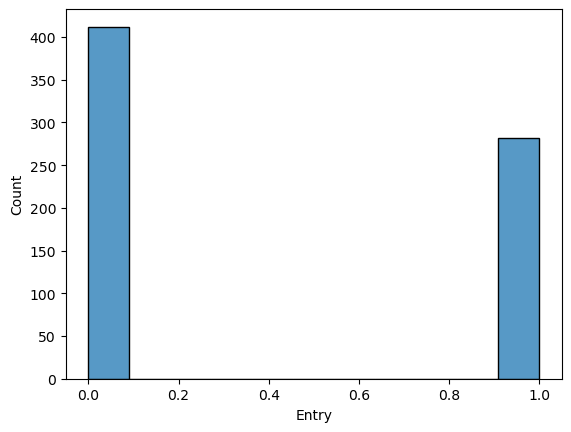

In [101]:
## Target Variable

sns.histplot(df["Entry"])

<Axes: xlabel='TicketClass', ylabel='Count'>

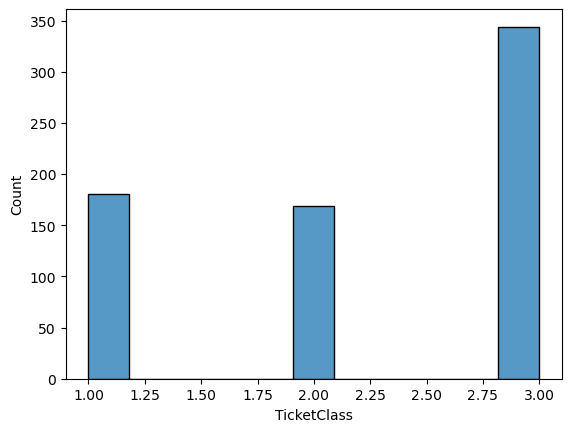

In [102]:
sns.histplot(df["TicketClass"])

<Axes: xlabel='Sex', ylabel='Count'>

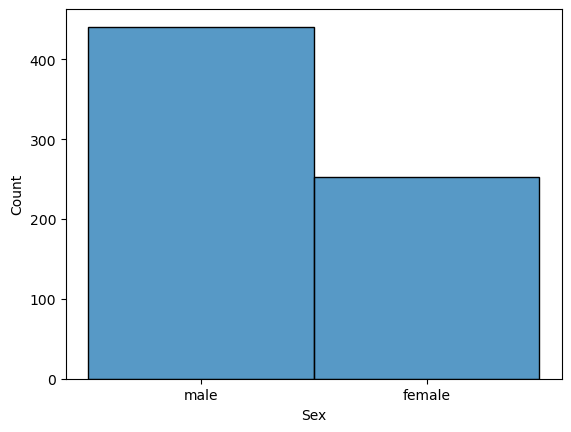

In [103]:
sns.histplot(data = df, x ='Sex')

/Users/kumarkishalaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


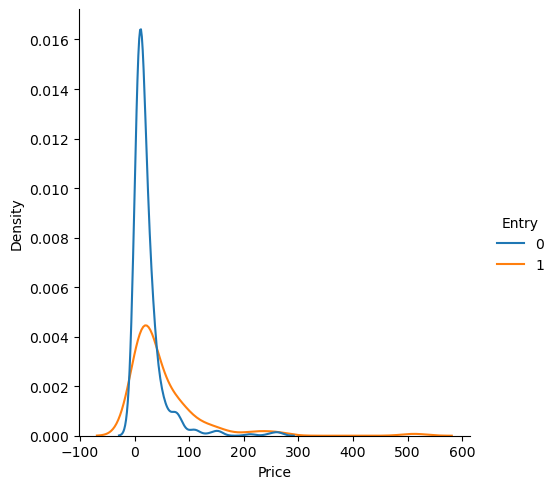

In [104]:
sns.displot(data = df, x = 'Price', hue="Entry", kind='kde')

/Users/kumarkishalaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


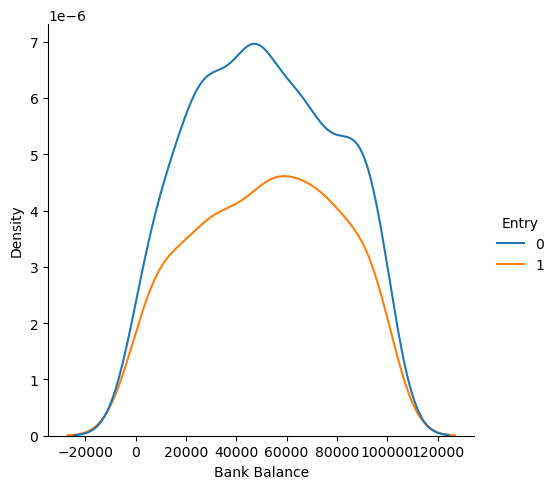

In [105]:
sns.displot(data = df, x = 'Bank Balance', hue="Entry", kind='kde')

In [106]:
# Encoding necessary variables - Sex

df["Sex"]= pd.get_dummies(df['Sex'],dtype='int',drop_first='True')

<Axes: >

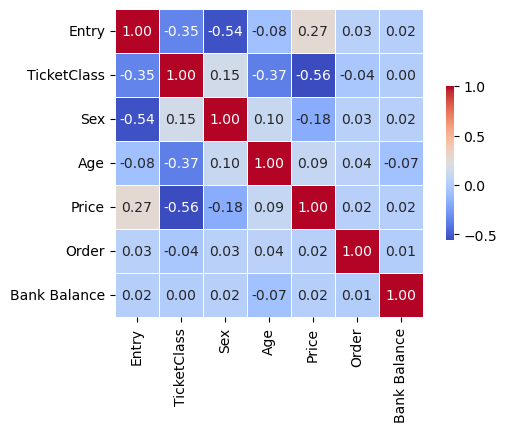

In [107]:
## Correlation plot

corr = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))  # You can adjust the size of the figure here
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})


#### Interpretations

- Everyone seems to have a comparable bank balance (Similar distribution 
- Pretty evenly balanced target variable (58% Entry, 42% no entry)
- Very similar ratio for male and female genders as well (~60-40)
- Ticket Class 3 seems to be the highest with class 2 & 1 being similar in volume. Probably ordinal in nature.
- There seems to be possibility of multicollinearity as Price and ticket class are correlated.


### Question 2 PCA Analysis

In [108]:
# splitting the dataset
X = df.iloc[:,1:]
y = df["Entry"]
y = y.reset_index().drop(columns='index', axis=1)
X = X.reset_index().drop(columns='index', axis=1)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

In [110]:
## Fitting a logistic regression
logr = LogisticRegression()
# Fit the model with training data
logr.fit(X_train, y_train)

/Users/kumarkishalaya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [111]:
logr_preds = logr.predict(X_test)

## Accuracy
accuracy = accuracy_score(y_test, logr_preds)
print(f'The accuracy is :{accuracy}')


The accuracy is :0.6698564593301436


#### PCA

In [112]:
pca = PCA()
X_pca =pca.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=19)

In [113]:
## WE can see that the first few components have the most variance

print(np.var(X_train_pca[:,0]))
print(np.var(X_train_pca[:,1]))
print(np.var(X_train_pca[:,2]))
print(np.var(X_train_pca[:,3]))
print(np.var(X_train_pca[:,4]))
print(np.var(X_train_pca[:,5]))

769477790.4156511
63770.7644324425
2324.9747220564805
212.85807579306984
0.4034533801830929
0.21064657437983353


In [114]:
##### Training Logistic Regression with first 2 components

In [115]:
X_train_pca_2 = X_train_pca[:,:2]
X_test_pca_2 = X_test_pca[:,:2]

In [116]:
## Fitting a logistic regression
logreg_2 = LogisticRegression()

# Fit the model with training data
logreg_2.fit(X_train_pca_2, y_train)

logreg_2_preds = logreg_2.predict(X_test_pca_2)

## Accuracy
accuracy = accuracy_score(y_test, logreg_2_preds)
print(f'The Accuracy is :{accuracy}')


The Accuracy is :0.5789473684210527


/Users/kumarkishalaya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
##### Training Logistic Regression with first 4 components

In [118]:

X_train_pca_4 = X_train_pca[:,:4]
X_test_pca_4 = X_test_pca[:,:4]

## Fitting a logistic regression
logreg_4 = LogisticRegression()

# Fit the model with training data
logreg_4.fit(X_train_pca_4, y_train)

logreg_4_preds = logreg_4.predict(X_test_pca_4)

## accuracy
accuracy = accuracy_score(y_test, logreg_4_preds)
print(f'The accuracy score is :{accuracy}')


The accuracy score is :0.6124401913875598


/Users/kumarkishalaya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
##### Training Logistic Regression with first 6 components

In [120]:

X_train_pca_6 = X_train_pca[:,:6]
X_test_pca_6 = X_test_pca[:,:6]

## Fitting a logistic regression
logreg_6 = LogisticRegression()

# Fit the model with training data
logreg_6.fit(X_train_pca_6, y_train)

logreg_6_preds = logreg_6.predict(X_test_pca_6)

## accuracy
accuracy = accuracy_score(y_test, logreg_6_preds)
print(f'The accuracy score is :{accuracy}')


The accuracy score is :0.6124401913875598


/Users/kumarkishalaya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
### Comparision with a LASSO Logistic Regression Model

In [122]:
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear')
lasso_log_reg.fit(X_train, y_train)
lasso_log_reg_pred = lasso_log_reg.predict(X_test)

## accuracy
accuracy = accuracy_score(y_test, lasso_log_reg_pred)
print(f'The accuracy score is :{accuracy}')


The accuracy score is :0.7799043062200957


/Users/kumarkishalaya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Interpretation

- The accuracy scores for the various models are given below -


    - Logistic Regression (LR) with 6 variables : 0.66
    - LR PCA with 2 components : 0.57
    - LR PCA with 4 components : 0.61
    - LR PCA with 6 compoents  : 0.61
    - LR LASSO with 6 variables: 0.78
        
- We can see that the variance for the first three components are significant but the last two components almost become zero variance. This is the basic property of PCA. 

- LASSO also helps in recognising important variables which explain the most variance and in this particular dataset, it performs better classification than simple Logisitic Regression.


-  One more thing to see here is, since the first few components have the most variance, the model prediction doesn't become much better as we keep adding more PCA components. It only mildly increases.


### Question 3 Decision Tree Analysis

#### Steps taken to preprocess the data (in question 1)

- Removed unnecessary columns not relevant to the data - Name & Ticket number

- Age had about ~175 rows of missing data out of a total of 869, procceded to delete the rows.

- Converted the gender (categorical) to one-hot encoded where male = 1/0 means if the gender is male or female. Dropped one of the columns to avoid dummy variable trap.

- Didn't change the ticket class since it seems to have ordinality.



In [123]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, dt_pred)
print(f'The accuracy score is :{accuracy}')


The accuracy score is :0.7559808612440191


#### Observation

- The Decision Tree classifier performs better than the simple logistic regression model but not more than the lasso model
- The Out of sample Accuracy for DT classifier is 0.75

### Question 4. K Means Clustering

In [124]:
## Using only Age and Price column

X_new = X[["Age", "Price"]]

/Users/kumarkishalaya/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Age', ylabel='Price'>

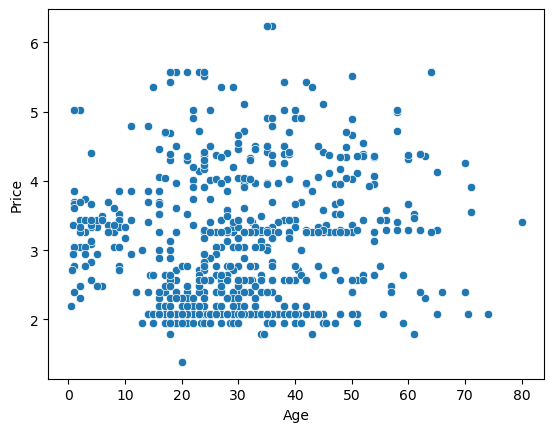

In [125]:
sns.scatterplot(x=X_new['Age'], y=np.log(X_new['Price']))

In [126]:
## Log transforming the Price column
X_new['Price'] =  np.log(X_new['Price']+1) # Adding a 1 since there are prices with 0.

/var/folders/ly/npw69p7x4lg1l7s7mm3y7twm0000gn/T/ipykernel_18968/152688889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Price'] =  np.log(X_new['Price']+1) # Adding a 1 since there are prices with 0.


In [127]:
## Scaling the variables because its necessary in k-means

scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

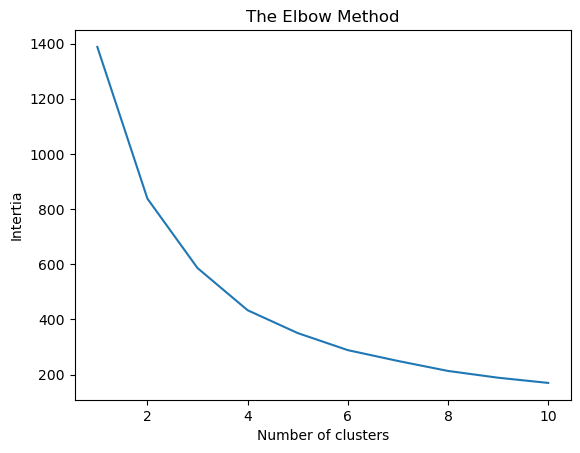

In [128]:
# Choosing the optimum K value for k-means using the elbow method

cs = [] # empty list
for i in range(1, 11): # Trying 11 different k values 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_new_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.show()

#### Interpretation
###### Choosing the right k

- Looking at the plot above, using the elbow method, we can choose k=2 since it is at that point that the curve changes the most from the initial drop

In [129]:
## Creating cluster using the above k (k=2)
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_new_scaled)

/Users/kumarkishalaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [130]:
X_new_scaled_df = pd.DataFrame(X_new_scaled)
X_new_scaled_df.columns = ['Age', 'Price']

In [131]:



## Assigning cluster values to each row
X_new_scaled_df['Cluster'] = kmeans.labels_

## Assigning the true labels to each row 
X_new_scaled_df['Entry'] = y

<Axes: xlabel='Age', ylabel='Price'>

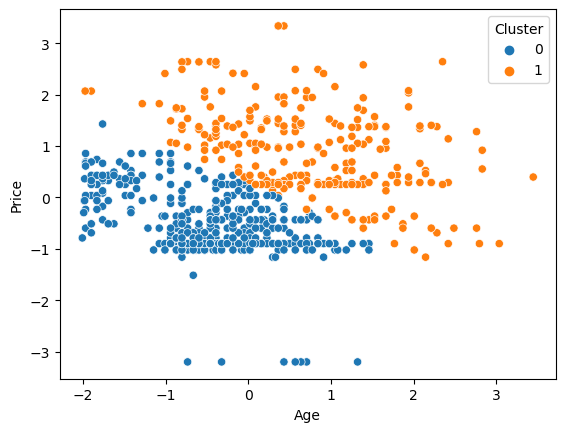

In [132]:
## Plotting the clusters for k means cluster

sns.scatterplot(X_new_scaled_df, x='Age', y="Price", hue = 'Cluster')

<Axes: xlabel='Age', ylabel='Price'>

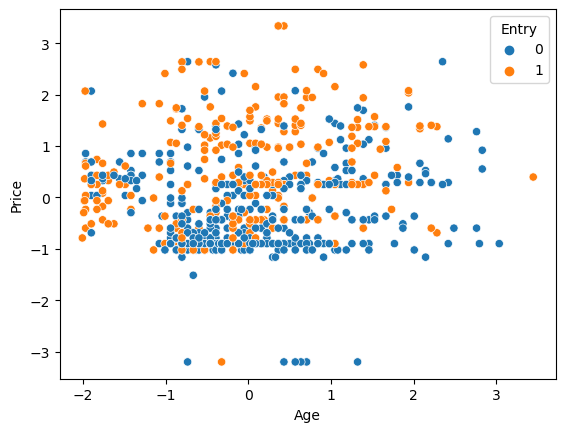

In [133]:
## Plotting the clusters which were the true labels
sns.scatterplot(X_new_scaled_df, x='Age', y="Price", hue = 'Entry')

#### Interpretation 

- We can see that the k-means clustering does a good job of doing a unsupervised clustering for the data it was provided with

- But if we use the actual labels (Entry) we can see that the clustering is being done differently. 